In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
X = pd.read_parquet('X.parquet')
Y = pd.read_parquet('Y.parquet')

In [46]:
# # Gerador de dados de entrada (5 variáveis)
# num_samples = 100
# X = np.random.rand(num_samples, 5)  # Dados de entrada aleatórios no intervalo [0, 1]

# # Gerar dados de saída (2 variáveis)
# Y = np.column_stack((np.sum(X[:, :3], axis=1), np.mean(X[:, 3:], axis=1)))

In [47]:
# descarregando valor do dataframe
X = X.values
Y = Y.values


# Dividir dados entre treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2
                                                    # , random_state=42
                                                    )

In [48]:
X.shape[1]

166

Epoch 1/500
1/1 - 1s - 1s/step - loss: 203.8363 - val_loss: 185.7162
Epoch 2/500
1/1 - 0s - 63ms/step - loss: 197.9309 - val_loss: 181.2780
Epoch 3/500
1/1 - 0s - 62ms/step - loss: 193.6455 - val_loss: 176.9109
Epoch 4/500
1/1 - 0s - 63ms/step - loss: 189.6477 - val_loss: 172.8075
Epoch 5/500
1/1 - 0s - 60ms/step - loss: 185.7243 - val_loss: 168.6917
Epoch 6/500
1/1 - 0s - 55ms/step - loss: 181.8478 - val_loss: 164.3265
Epoch 7/500
1/1 - 0s - 54ms/step - loss: 177.8346 - val_loss: 159.8635
Epoch 8/500
1/1 - 0s - 64ms/step - loss: 173.7267 - val_loss: 155.1295
Epoch 9/500
1/1 - 0s - 60ms/step - loss: 169.4488 - val_loss: 150.4235
Epoch 10/500
1/1 - 0s - 60ms/step - loss: 165.0480 - val_loss: 145.4659
Epoch 11/500
1/1 - 0s - 60ms/step - loss: 160.3002 - val_loss: 140.2319
Epoch 12/500
1/1 - 0s - 53ms/step - loss: 155.0700 - val_loss: 134.7280
Epoch 13/500
1/1 - 0s - 72ms/step - loss: 149.7157 - val_loss: 129.0690
Epoch 14/500
1/1 - 0s - 55ms/step - loss: 144.1772 - val_loss: 123.2803
Epo

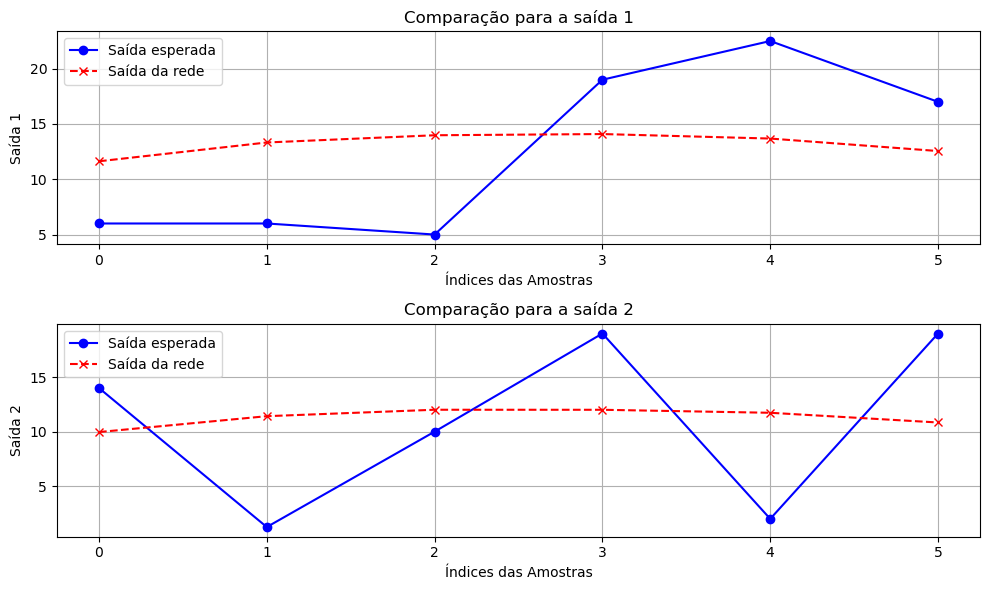

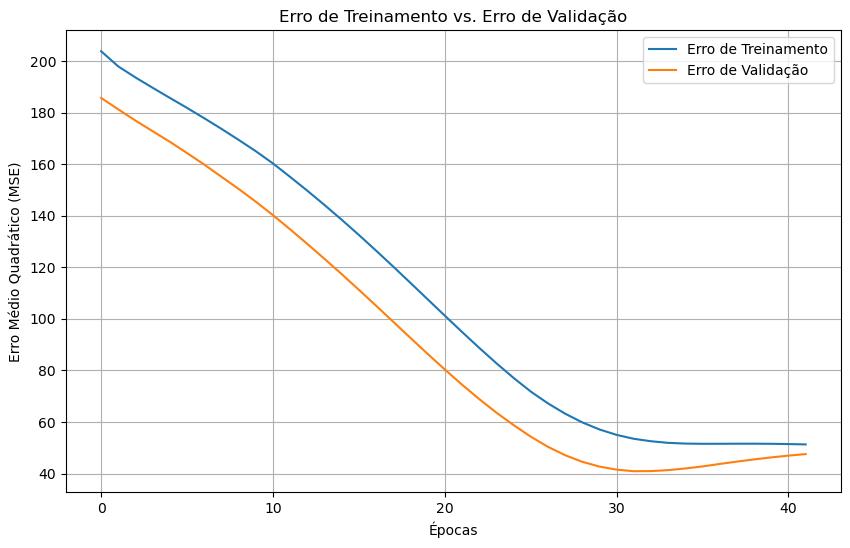

In [49]:
# Criar e configurar o modelo
model = Sequential()
model.add(Input(shape=(X.shape[1],)))# Hidden 1
# model.add(Dense(20, input_dim=X.shape[1], activation='relu'))# Camada oculta com n neurônios
model.add(Dense(200, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(Y.shape[1], activation='linear'))  # Camada de saída com 2 neurônios

# Compilar o modelo
model.compile(optimizer='nadam', loss='mean_squared_error')

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitora a perda no conjunto de validação
    patience=10,         # Número de épocas sem melhora antes de parar
    restore_best_weights=True  # Restaura os pesos da melhor época
)

# Treinar o modelo com Early Stopping
history = model.fit(
    X_train, Y_train,
    epochs=500, 
    verbose=2, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Testar o modelo
Y_pred = model.predict(X_test)

# Avaliar desempenho
mse_error = mean_squared_error(Y_test, Y_pred)
print(f"Erro médio quadrático (MSE) no conjunto de teste: {mse_error:.4f}")

# Plotar resultados
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(Y_test[:, i], 'b-o', label='Saída esperada')
    plt.plot(Y_pred[:, i], 'r--x', label='Saída da rede')
    plt.xlabel('Índices das Amostras')
    plt.ylabel(f'Saída {i+1}')
    plt.legend()
    plt.grid(True)
    plt.title(f'Comparação para a saída {i+1}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento') 
plt.plot(history.history['val_loss'], label='Erro de Validação') 
plt.xlabel('Épocas') 
plt.ylabel('Erro Médio Quadrático (MSE)') 
plt.legend() 
plt.grid(True) 
plt.title('Erro de Treinamento vs. Erro de Validação') 
plt.show()
